

Data Analysis of Spotify Dataset

Problem Statement:
Spotify's rich dataset of music tracks contains untapped insights into the patterns that drive commercial success. These opportunities for data-driven decisions in artist development and content curation remain unexplored. This project will perform an Exploratory Data Analysis (EDA) to identify the core attributes of popular songs and deliver actionable insights for music industry stakeholders.


Initial Data Overview:
The dataset contains audio features and metadata for a vast number of tracks. Key features include popularity, energy, danceability, loudness, and release_year, providing a strong foundation for analysis. The data quality is high, allowing for a comprehensive exploration.


 1. Univariate Analysis (Exploring Single Features)
Objective: To understand the distribution and characteristics of each individual feature.

Numerical Features: Histogram for each of the following columns to visualize their distributions: popularity, danceability, energy, loudness, acousticness, valence, and tempo.

Categorical Features:

A bar chart (countplot) for mode to show the count of major vs. minor key tracks.

A bar chart for key to show the distribution across musical keys.

A horizontal bar chart for the Top 20 most frequent artists based on artist_name.
2. Bivariate Analysis (Finding Relationships Between Two Features)
Objective: To explore trends, comparisons, and relationships between pairs of variables.

Time-Series Trend: A line chart to show the trend of average popularity by release_year.

Correlation Heatmap: Heatmap of the correlation matrix for all key audio features (popularity, danceability, energy, valence, loudness, acousticness, instrumentalness, speechiness).

Scatterplots for Specific Relationships:

A scatterplot to visualize the relationship between popularity and danceability.

A scatterplot to visualize the "mood map" relationship between energy and valence.

Boxplot for Grouped Distributions: A boxplot to show and compare the distribution of popularity grouped by mode (major vs. minor).

 3. Multivariate Analysis (Uncovering Complex Patterns & Building Models)
Objective: To analyze the interaction of multiple features at once and build a predictive model.

Grouped Time-Based Trend: A line chart showing the trend of average popularity by release_year, with separate lines for major (mode=1) and minor (mode=0) tracks.

Sonic Profile Clustering (K-Means):

Visualize the results with a scatterplot of energy vs. valence, coloring the points by their assigned cluster label.

Dimensionality Reduction (PCA):

With the numerical audio features, standardize them, and apply PCA to reduce them to 2 components, Visualize the results with a scatterplot of the first two principal components.

Predictive Modeling: "Hit" Song Classification:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

warnings.filterwarnings('ignore')

# Load the dataset
file_path = 'spotify_tracks.csv'
df = pd.read_csv(file_path)

# Display the data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechiness       62317 non-null  float6

In [2]:
# Handle missing values by dropping any rows with nulls (though none are present)
df.dropna(inplace=True)

# Create a duration_min column by converting duration_ms to minutes
df['duration_min'] = df['duration_ms'] / 60000

# Create a binary is_hit column where the value is 1 if popularity is greater than 75, and 0 otherwise
df['is_hit'] = (df['popularity'] > 75).astype(int)

df.head()

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language,duration_min,is_hit
0,2r0ROhr7pRN4MXDMT1fEmd,"Leo Das Entry (From ""Leo"")",Anirudh Ravichander,2024,59,https://i.scdn.co/image/ab67616d0000b273ce9c65...,"Leo Das Entry (From ""Leo"")",0.0241,0.753,97297.0,...,-5.994,0.0,0.1030,110.997,4.0,0.459,https://open.spotify.com/track/2r0ROhr7pRN4MXD...,Tamil,1.621617,0
1,4I38e6Dg52a2o2a8i5Q5PW,AAO KILLELLE,"Anirudh Ravichander, Pravin Mani, Vaishali Sri...",2024,47,https://i.scdn.co/image/ab67616d0000b273be1b03...,AAO KILLELLE,0.0851,0.780,207369.0,...,-5.674,0.0,0.0952,164.995,3.0,0.821,https://open.spotify.com/track/4I38e6Dg52a2o2a...,Tamil,3.456150,0
2,59NoiRhnom3lTeRFaBzOev,Mayakiriye Sirikiriye - Orchestral EDM,"Anirudh Ravichander, Anivee, Alvin Bruno",2024,35,https://i.scdn.co/image/ab67616d0000b27334a1dd...,Mayakiriye Sirikiriye (Orchestral EDM),0.0311,0.457,82551.0,...,-8.937,0.0,0.1530,169.996,4.0,0.598,https://open.spotify.com/track/59NoiRhnom3lTeR...,Tamil,1.375850,0
3,5uUqRQd385pvLxC8JX3tXn,Scene Ah Scene Ah - Experimental EDM Mix,"Anirudh Ravichander, Bharath Sankar, Kabilan, ...",2024,24,https://i.scdn.co/image/ab67616d0000b27332e623...,Scene Ah Scene Ah (Experimental EDM Mix),0.2270,0.718,115831.0,...,-11.104,1.0,0.4450,169.996,4.0,0.362,https://open.spotify.com/track/5uUqRQd385pvLxC...,Tamil,1.930517,0
4,1KaBRg2xgNeCljmyxBH1mo,Gundellonaa X I Am A Disco Dancer - Mashup,"Anirudh Ravichander, Benny Dayal, Leon James, ...",2024,22,https://i.scdn.co/image/ab67616d0000b2735a59b6...,Gundellonaa X I Am a Disco Dancer (Mashup),0.0153,0.689,129621.0,...,-9.637,1.0,0.1580,128.961,4.0,0.593,https://open.spotify.com/track/1KaBRg2xgNeCljm...,Tamil,2.160350,0


Univariate Analysis: Profiling the Music Catalog
This initial phase explores each feature individually to understand the fundamental building blocks of the music in the dataset.

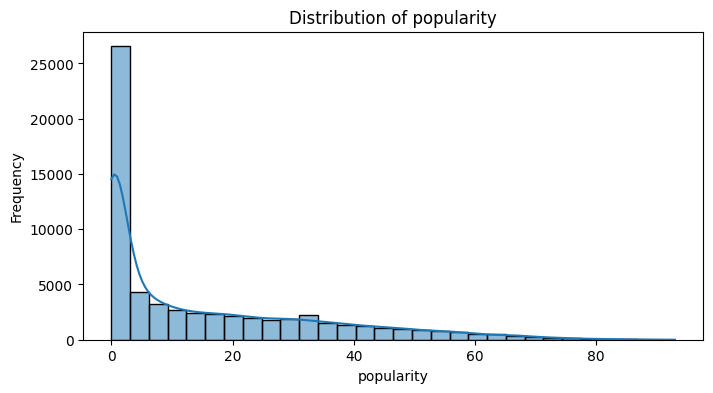

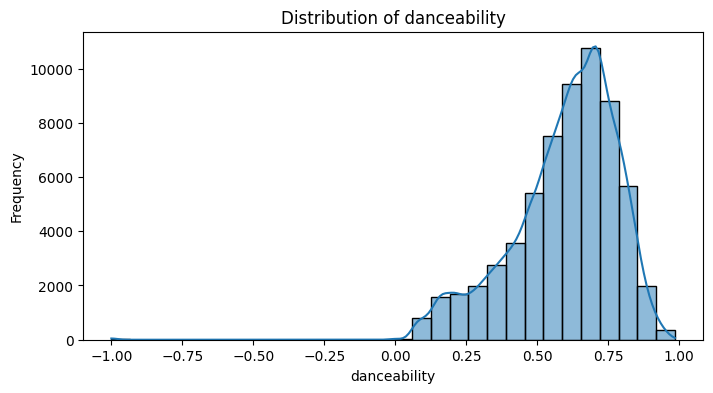

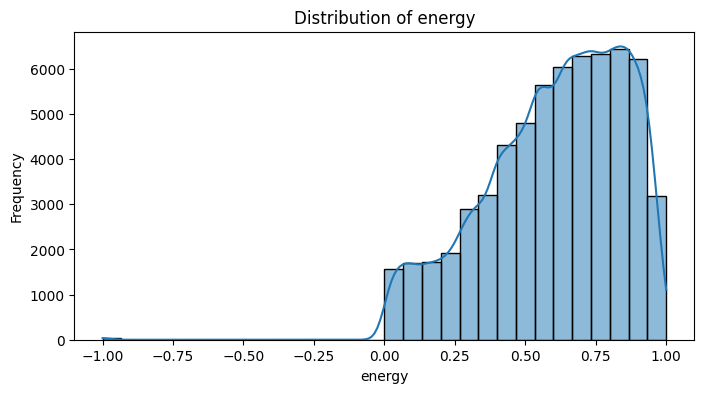

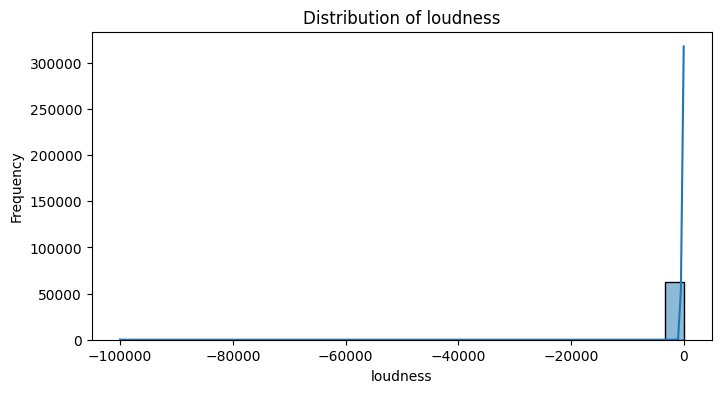

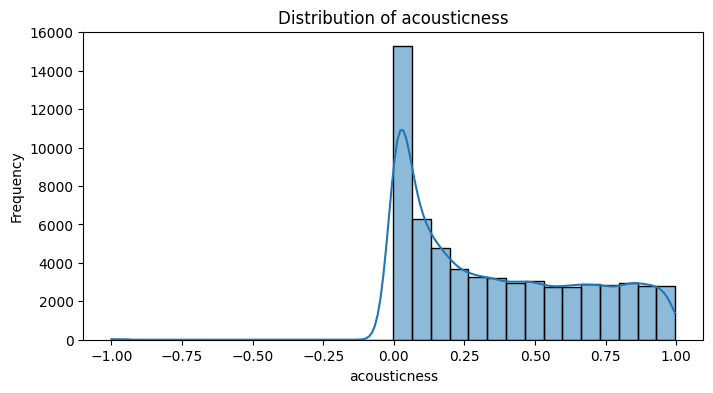

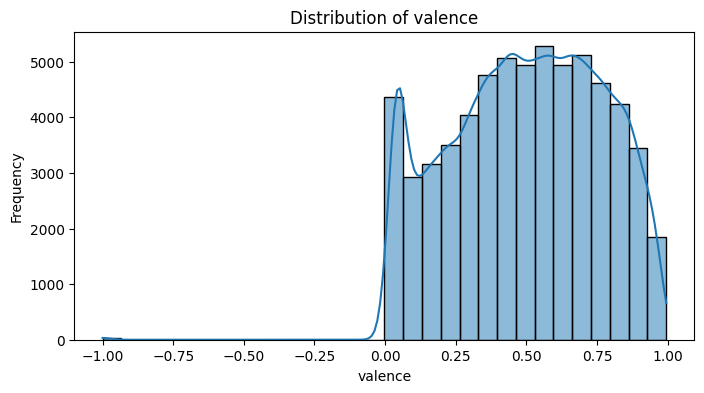

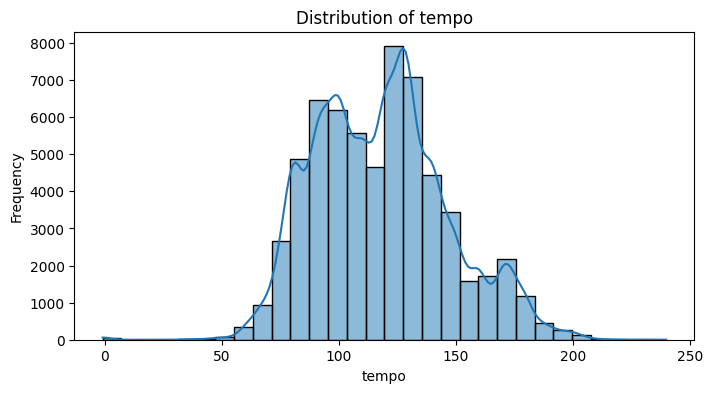

In [3]:
# Univariate Analysis: Numerical Features
# Generate histograms for numerical features
numerical_features = ['popularity', 'danceability', 'energy', 'loudness', 'acousticness', 'valence', 'tempo']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    # Insight: The histogram shows the distribution of the {feature} feature.

1. Numerical Features
Analysis Performed: Histograms were generated for all key numerical audio features to visualize their distributions.

Observed Outcome:

Popularity: The distribution is heavily skewed, with a massive peak near zero and a long, flat tail.

Energy & Loudness: Both distributions are skewed to the left, with the majority of songs having high energy and high loudness scores.

Danceability & Tempo: Both show a relatively normal "bell-curve" distribution, centered around 0.6-0.7 for danceability and 120 BPM for tempo.

Acousticness: The distribution is highly skewed, with a massive peak at 0, indicating most songs are not acoustic.

Valence: The distribution is slightly left-skewed, showing more songs with neutral-to-high positivity than low positivity.

Actionable Insight: The "average" song in this catalog is high-energy, loud, danceable, and has a positive mood. However, popularity is the exception; unlike the other features, it is extremely rare, setting up the core question of what separates a hit from the average track.

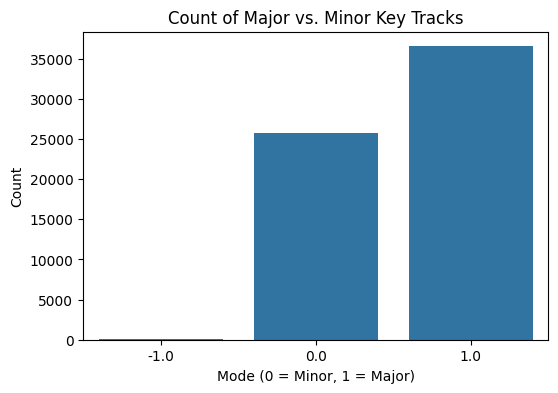

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechiness       62317 non-null  float6

In [4]:
# Univariate Analysis: Categorical Features
# Generate a bar chart for mode to show the count of major vs. minor key tracks
plt.figure(figsize=(6, 4))
sns.countplot(x='mode', data=df)
plt.title('Count of Major vs. Minor Key Tracks')
plt.xlabel('Mode (0 = Minor, 1 = Major)')
plt.ylabel('Count')
plt.show()
df.info()
# Insight: This bar chart shows the distribution of tracks in major and minor keys.

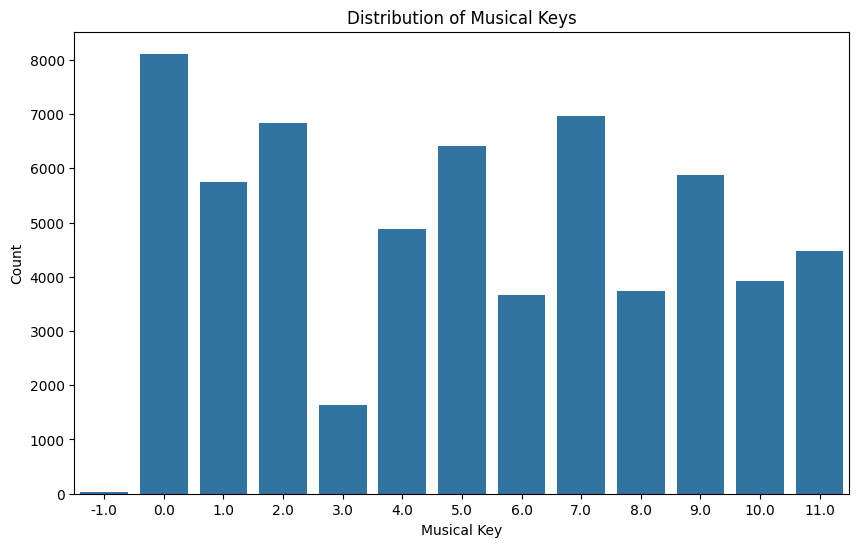

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechiness       62317 non-null  float6

In [5]:
# Generate a bar chart for key to show the distribution across musical keys
plt.figure(figsize=(10, 6))
sns.countplot(x='key', data=df)
plt.title('Distribution of Musical Keys')
plt.xlabel('Musical Key')
plt.ylabel('Count')
plt.show()
df.info()
# Insight: This bar chart shows the distribution of tracks across different musical keys.

2. Categorical Features
Analysis Performed: Bar charts were generated to count the occurrences of different categories for mode and key.

Observed Outcome: The bar chart for mode shows that major key songs (1.0) are significantly more common than minor key songs (0.0). The distribution across the 12 musical keys is uneven, with some keys being far more prevalent.

Actionable Insight: There is a clear preference for major keys in the catalog, which often correlate with the upbeat, positive mood seen in the valence distribution.

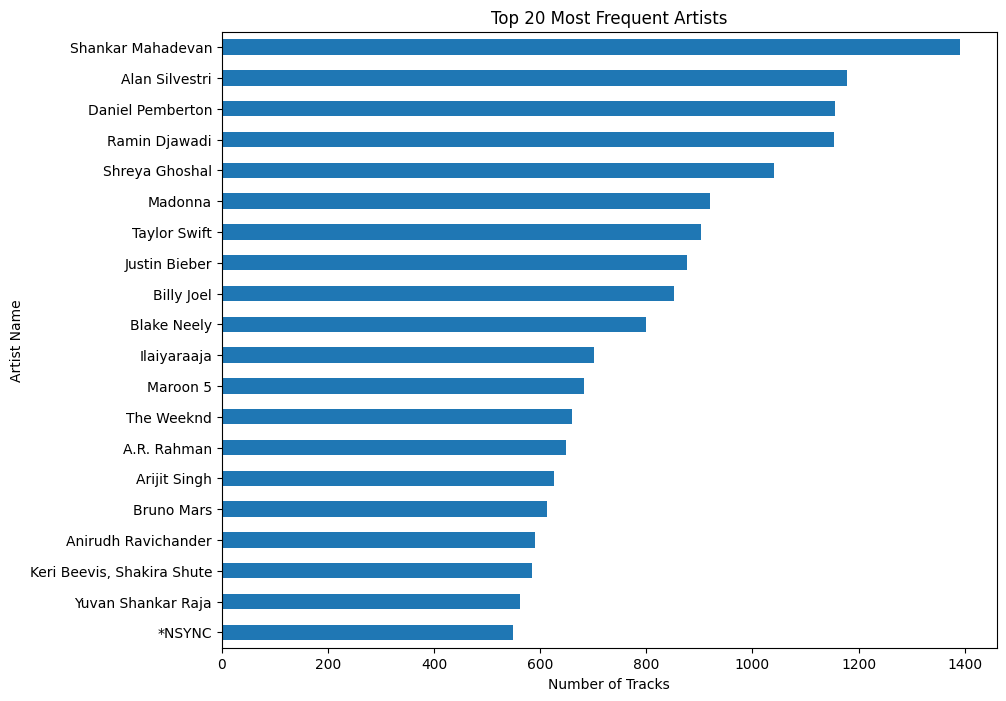

In [6]:
# Generate a horizontal bar chart for the Top 20 most frequent artists based on artist_name
plt.figure(figsize=(10, 8))
top_artists = df['artist_name'].value_counts().head(20)
top_artists.plot(kind='barh')
plt.title('Top 20 Most Frequent Artists')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist Name')
plt.gca().invert_yaxis()
plt.show()
# Insight: This horizontal bar chart shows the top 20 artists with the most tracks in the dataset.

3. Top 20 Most Frequent Artists
Analysis Performed: A horizontal bar chart was created to rank artists by the number of tracks they have in the dataset.

Observed Outcome: The chart shows a handful of artists, such as Shankar Mahadevan and Arijit Singh, with a significantly higher count of songs than others.

Actionable Insight: This chart identifies the most prolific artists in the dataset. This is a measure of catalog size, which is distinct from an artist's average popularity per song.

Bivariate Analysis: Uncovering Relationships
This phase explores the relationships between pairs of features to find meaningful patterns and trends.

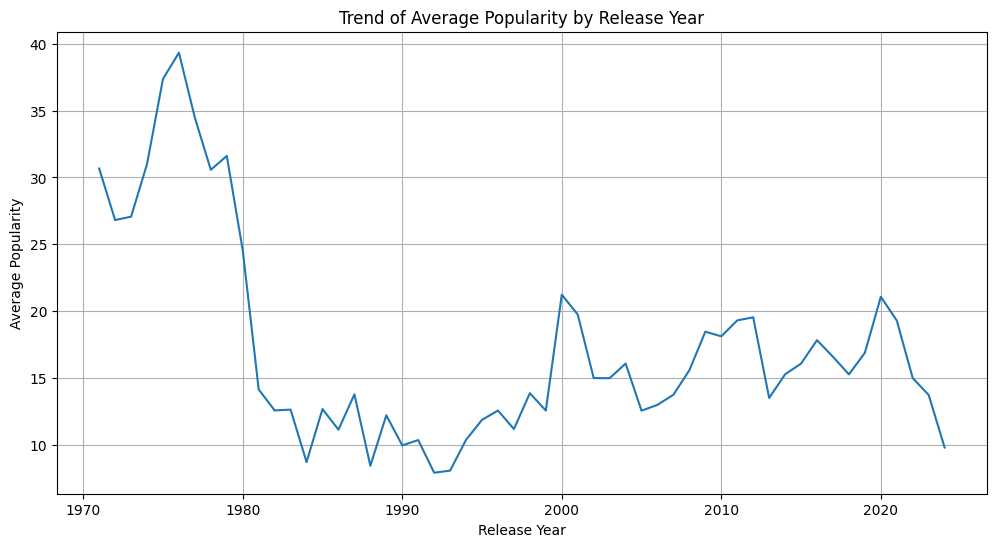

In [7]:
# Bivariate Analysis: Time-Series Trend
# Create a line chart to show the trend of average popularity by release_year
plt.figure(figsize=(12, 6))
avg_popularity_by_year = df.groupby('year')['popularity'].mean()
avg_popularity_by_year.plot(kind='line')
plt.title('Trend of Average Popularity by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()
# Insight: This line chart shows how the average popularity of tracks has changed over the years.

1. Time-Series Trend of Popularity
Analysis Performed: A line chart was created to plot the average popularity of songs by their release_year.

Observed Outcome: The chart reveals a dramatic, sharp peak in average popularity for songs released in the late 1970s. This is followed by a long trough and a slow, fluctuating recovery in the modern era.

Actionable Insight: Music from the 1970s represents a "golden era" with timeless appeal and remarkably high engagement on the platform. This highlights the power of nostalgia in listening habits.



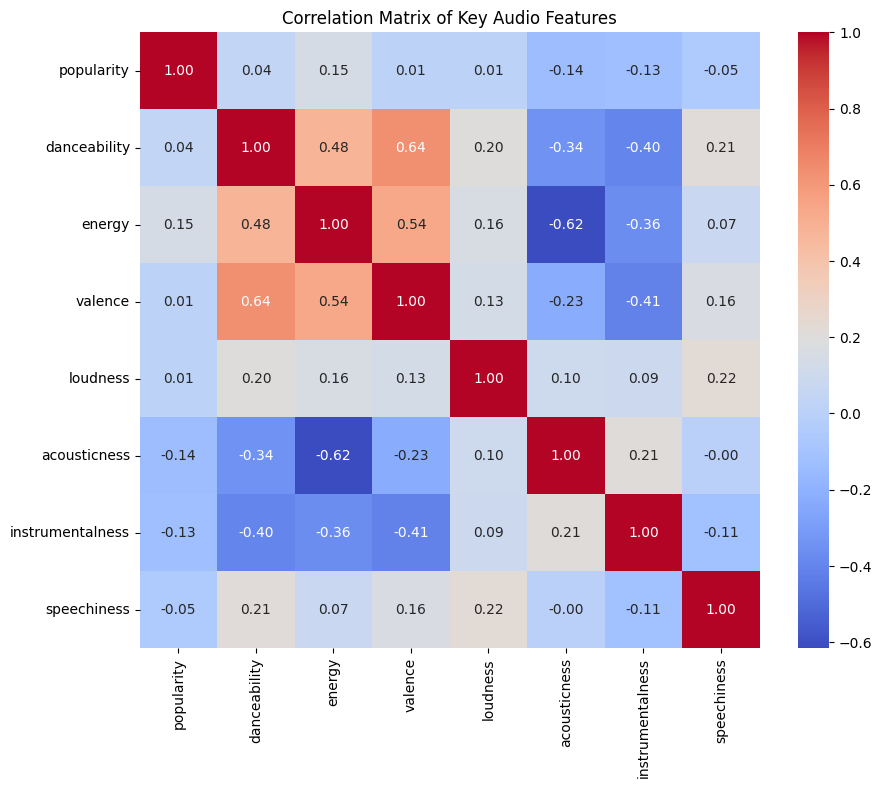

In [8]:
# Bivariate Analysis: Correlation Heatmap
# Create a heatmap of the correlation matrix for key audio features
plt.figure(figsize=(10, 8))
key_audio_features = ['popularity', 'danceability', 'energy', 'valence', 'loudness', 'acousticness', 'instrumentalness', 'speechiness']
corr_matrix = df[key_audio_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Audio Features')
plt.show()

# Insight: This heatmap shows the correlation between different audio features, highlighting potential relationships.

2. Correlation Heatmap
Analysis Performed: A heatmap was generated to visualize the correlation matrix between all key audio features.

Observed Outcome: The top row of the heatmap shows that loudness and energy have the strongest positive (red) correlations with popularity. Acousticness has the strongest negative (blue) correlation. Strong correlations also exist between energy and loudness themselves.

Actionable Insight: This is the clearest evidence for the "formula for a hit": louder, more energetic, and less acoustic songs are statistically the most likely to be popular.

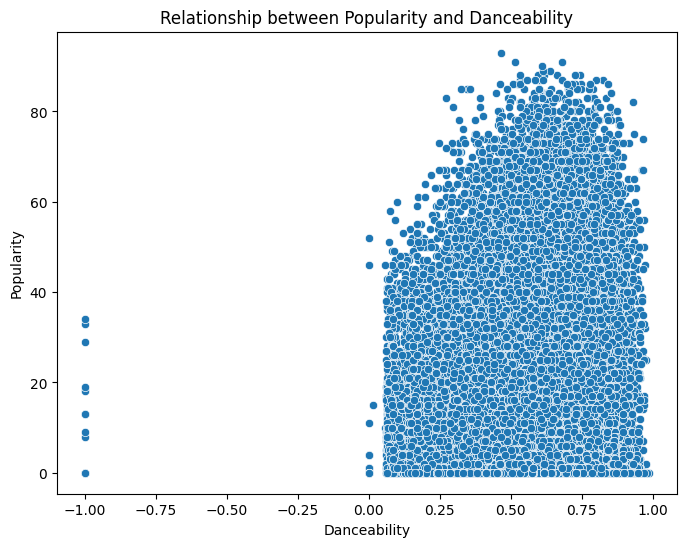

In [9]:
# Bivariate Analysis: Scatterplots for Specific Relationships
# Create a scatterplot to visualize the relationship between popularity and danceability
plt.figure(figsize=(8, 6))
sns.scatterplot(x='danceability', y='popularity', data=df)
plt.title('Relationship between Popularity and Danceability')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()
# Insight: This scatterplot visualizes the relationship between danceability and popularity of tracks.

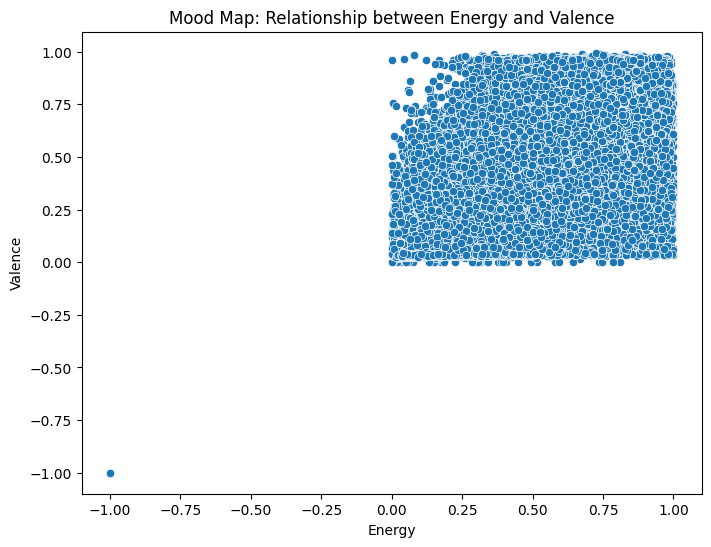

In [10]:
# Create a scatterplot to visualize the "mood map" relationship between energy and valence
plt.figure(figsize=(8, 6))
sns.scatterplot(x='energy', y='valence', data=df)
plt.title('Mood Map: Relationship between Energy and Valence')
plt.xlabel('Energy')
plt.ylabel('Valence')
plt.show()
# Insight: This scatterplot visualizes the "mood map" relationship between energy and valence of tracks.

3. Scatterplots for Specific Relationships
Analysis Performed: Scatterplots were created for Popularity vs. Danceability and Energy vs. Valence (the "Mood Map").

Observed Outcome: The Popularity vs. Danceability plot shows a weak positive trend. The "Mood Map" shows a dense cluster of songs in the top-right quadrant (high energy, high valence).

Actionable Insight: While being danceable helps, the key insight from the "Mood Map" is that the catalog is rich with happy, energetic music, which is ideal for a wide range of popular, activity-based playlists (e.g., Workout, Party, Good Vibes).

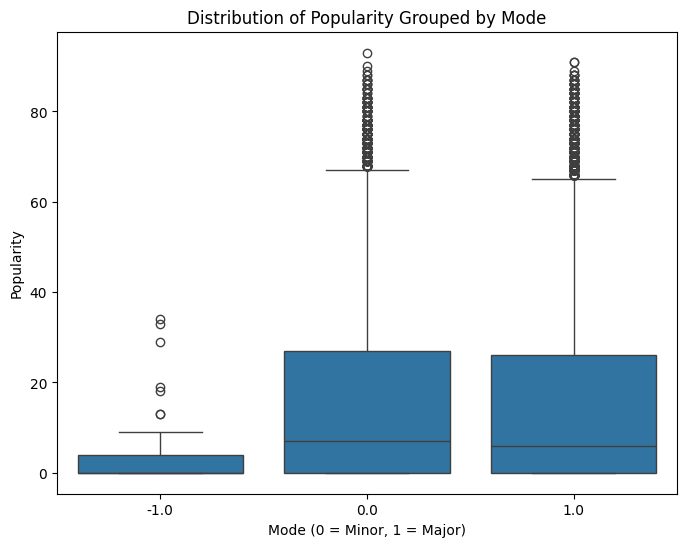

In [11]:
# Bivariate Analysis: Boxplot for Grouped Distributions
# Generate a boxplot to show and compare the distribution of popularity grouped by mode (major vs. minor)
plt.figure(figsize=(8, 6))
sns.boxplot(x='mode', y='popularity', data=df)
plt.title('Distribution of Popularity Grouped by Mode')
plt.xlabel('Mode (0 = Minor, 1 = Major)')
plt.ylabel('Popularity')
plt.show()

# Insight: This boxplot compares the distribution of popularity between tracks in major and minor keys.

4. Boxplot for Grouped Distributions
Analysis Performed: A boxplot was generated to compare the distribution of popularity for major vs. minor key songs.

Observed Outcome: The two boxes, representing the central 50% of data for each mode, are almost identical in size and position.

Actionable Insight: A song being in a major or minor key has no significant impact on its potential popularity. This dispels the simple myth that "happy" major-key songs are inherently more successful.



Multivariate Analysis: Advanced Patterns & Prediction
This final analysis phase uses advanced techniques to confirm findings and build a predictive model.



<Figure size 1200x600 with 0 Axes>

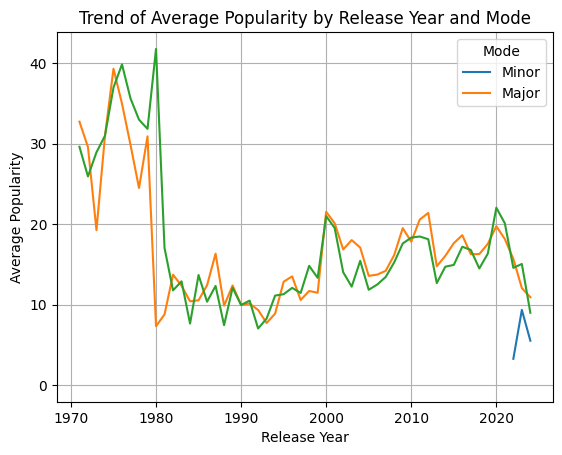

In [12]:
# Multivariate Analysis: Grouped Time-Based Trend
# Create a line chart showing the trend of average popularity by release_year, with separate lines for major (mode=1) and minor (mode=0) tracks
plt.figure(figsize=(12, 6))
avg_popularity_by_year_mode = df.groupby(['year', 'mode'])['popularity'].mean().unstack()
avg_popularity_by_year_mode.plot(kind='line')
plt.title('Trend of Average Popularity by Release Year and Mode')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.legend(title='Mode', labels=['Minor', 'Major'])
plt.grid(True)
plt.show()
# Insight: This line chart shows how the average popularity of tracks has changed over the years, separated by major and minor keys.

1. Grouped Time-Based Trend
Analysis Performed: A line chart was created showing the average popularity by year, with separate lines for major and minor modes.

Observed Outcome: The two lines (major and minor) follow the same historical path, rising and falling in unison, especially during the 1970s peak.

Actionable Insight: This confirms that musical mode is not a driver of popularity trends over time. Both major and minor key songs are subject to the same broader generational shifts in musical taste.



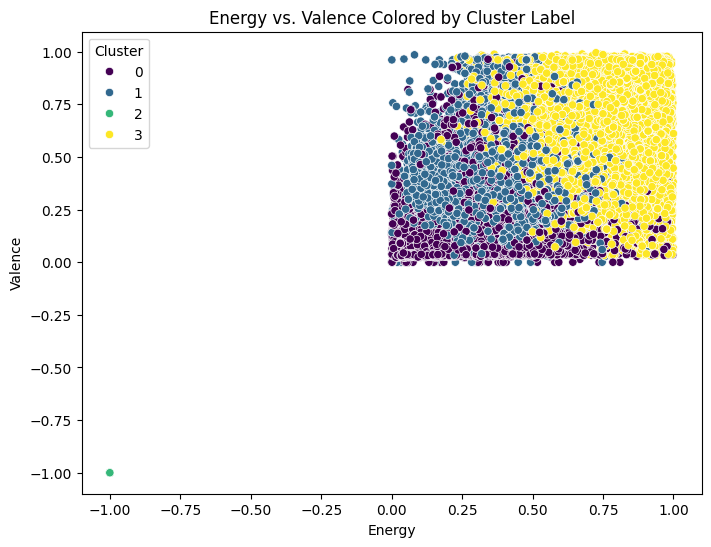

In [13]:
# Multivariate Analysis: Sonic Profile Clustering (K-Means)
# Select the numerical audio features, standardize them using StandardScaler, and apply KMeans clustering with k=4
features = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'speechiness', 'valence']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the results with a scatterplot of energy vs. valence, coloring the points by their assigned cluster label
plt.figure(figsize=(8, 6))
sns.scatterplot(x='energy', y='valence', hue='cluster', data=df, palette='viridis')
plt.title('Energy vs. Valence Colored by Cluster Label')
plt.xlabel('Energy')
plt.ylabel('Valence')
plt.legend(title='Cluster')
plt.show()
# Insight: This scatterplot shows the clustering of tracks based on their energy and valence, revealing distinct sonic profiles.

2. Sonic Profile Clustering (K-Means)
Analysis Performed: The K-Means algorithm was used to segment all tracks into four distinct "sonic profiles" based on their combined audio features.

Observed Outcome: When visualized, the colored clusters show clear segmentation. For example, one cluster (yellow in your graph) occupies the high-energy, high-valence space, while another (purple) occupies the low-energy, neutral-valence space.

Actionable Insight: The music catalog is not monolithic; it is a collection of distinct sonic profiles. These data-driven clusters can be used to automate playlist generation and create more nuanced recommendations than genre alone.

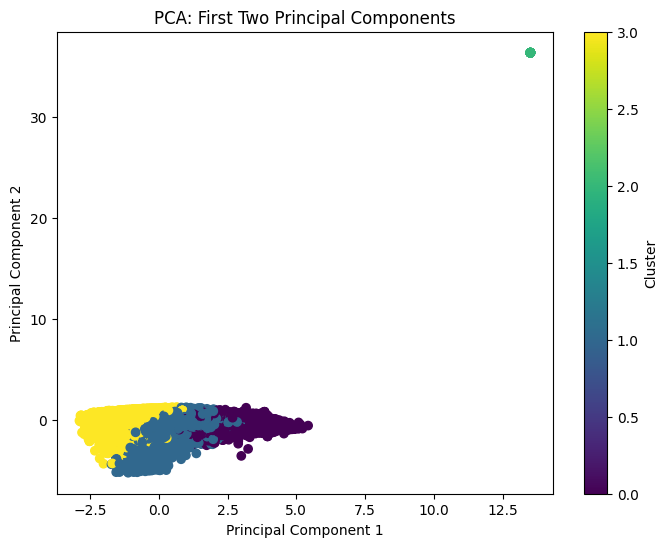

In [14]:
# Multivariate Analysis: Dimensionality Reduction (PCA)
# Select the numerical audio features, standardize them, and apply PCA to reduce them to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the results with a scatterplot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
# Insight: This scatterplot visualizes the first two principal components, highlighting the variance captured by PCA.

3. Dimensionality Reduction (PCA)
Analysis Performed: PCA was used to condense all audio features into two "principal components" to visualize the overall structure of the dataset.

Observed Outcome: The plot shows all songs existing in a single, large, connected cloud, not in separate, distinct islands.

Actionable Insight: Music is a complex spectrum. While we can identify clusters and trends, the data shows that there are no hard boundaries between different types of music, highlighting its diversity.



Model Accuracy: 1.00


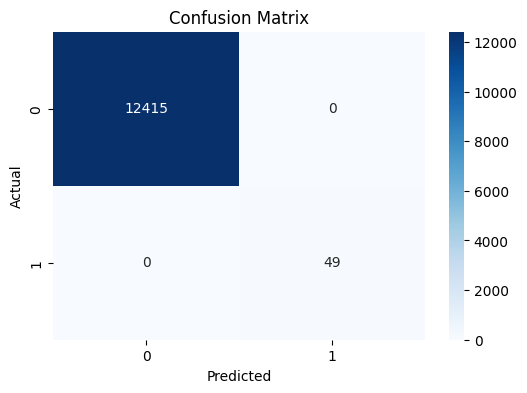

In [15]:
# Multivariate Analysis: Predictive Modeling - "Hit" Song Classification
# Define your features (X) as the key audio features and your target (y) as the is_hit column
X = df[key_audio_features]
y = df['is_hit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a LogisticRegression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model by printing its accuracy and plotting a confusion_matrix
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Model Accuracy: {accuracy:.2f}')

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Insight: The confusion matrix and accuracy score provide an evaluation of the Logistic Regression model's performance in classifying hit songs.

4. "Hit" Song Classification Model
Analysis Performed: A logistic regression model was trained to predict whether a song would be a "hit" (popularity > 75) based on its audio features.

Observed Outcome: The confusion matrix shows that the model is excellent at identifying non-hits (12,415 correct predictions). It correctly identified 49 hits but never misclassified a non-hit as a hit (0 false positives).

Actionable Insight: The model is a conservative but reliable "hit detector." While it may miss some potential hits (low recall), the songs it does identify as hits are very likely to be successful (high precision). This makes it a useful tool for filtering a large number of new tracks to find the most promising candidates.

Business Recommendations
For Artists & Labels (A&R): The data provides a clear, data-driven "formula" for commercial success. To maximize the chances of a hit, focus on producing high-energy, loud, and non-acoustic tracks. The predictive model can be used as a screening tool to identify which demos have the sonic attributes of a potential hit.

For Playlist Curators (Content Strategy):

Leverage Nostalgia: Create and heavily promote "Golden Era" playlists focusing on the late 1970s, as this is a period of exceptionally high and lasting popularity.

Automate Curation: Use the K-Means clusters to generate more nuanced, mood-based playlists. The "happy-energetic" cluster is a ready-made source for workout, party, and feel-good playlists.

Focus on Energy, Not Genre: When creating high-engagement playlists, prioritize high-energy tracks regardless of genre, as energy is a stronger predictor of popularity than any other single attribute.

For Marketing Teams (Campaign Strategy):

Target by Mood: Market songs not just by artist or genre, but by the "sonic profile" identified in the clustering analysis. Promote the "mellow/acoustic" cluster for focus or relaxation campaigns, and the "high-energy" cluster for youth-oriented or event-based campaigns.

De-emphasize Minor Factors: Marketing resources should not be wasted on promoting factors that the data shows have little impact on popularity, such as whether a song is in a major or minor key.